In [322]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [323]:
data=pd.read_csv("/content/collegePlace.csv")

In [324]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [325]:

# Create a new column for Certifications and initialize it with zeros
data['Certifications'] = 0

# Iterate over each row and update the Certifications column based on CGPA values
for index, row in data.iterrows():
    cgpa = row['CGPA']
    if cgpa > 7:
        data.at[index, 'Certifications'] = 4
    elif cgpa < 7:
        data.at[index, 'Certifications'] = 1
    else:
        data.at[index, 'Certifications'] = 3

# Save the modified DataFrame to a new CSV file


In [326]:

# Create a new column for training and initialize it with zeros
data['training'] = 0

# Iterate over each row and update the training column based on CGPA values
for index, row in data.iterrows():
    cgpa = row['CGPA']
    Internships=row['Internships']
    if cgpa > 6 and Internships==1:
        data.at[index, 'training'] = 1
    elif cgpa < 6 and Internships==1:
        data.at[index, 'training'] = 0
    elif cgpa > 7 and Internships==0:
        data.at[index, 'training'] = 1
    else:
        data.at[index, 'training']=0

# Save the modified DataFrame to a new CSV file


In [327]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Certifications,training
0,22,Male,Electronics And Communication,1,8,1,1,1,4,1
1,21,Female,Computer Science,0,7,1,1,1,3,0
2,22,Female,Information Technology,1,6,0,0,1,1,0
3,21,Male,Information Technology,0,8,0,1,1,4,1
4,22,Male,Mechanical,0,8,1,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0,3,0
2962,23,Male,Mechanical,1,7,1,0,0,3,1
2963,22,Male,Information Technology,1,7,0,0,0,3,1
2964,22,Male,Computer Science,1,7,0,0,0,3,1


In [328]:
print(f"Shape of Dataframe is: {data.shape}")


Shape of Dataframe is: (2966, 10)


In [329]:
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis("Column Name")


,Datatype
Column Name,
Age,int64
Gender,object
Stream,object
Internships,int64
CGPA,int64
Hostel,int64
HistoryOfBacklogs,int64
PlacedOrNot,int64
Certifications,int64


In [330]:
data.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')


,count,mean,std,min,25%,50%,75%,max
Age,2966.000000,21.485840,1.324933,19.000000,21.000000,21.000000,22.000000,30.000000
Internships,2966.000000,0.703641,0.740197,0.000000,0.000000,1.000000,1.000000,3.000000
CGPA,2966.000000,7.073837,0.967748,5.000000,6.000000,7.000000,8.000000,9.000000
Hostel,2966.000000,0.269049,0.443540,0.000000,0.000000,0.000000,1.000000,1.000000
HistoryOfBacklogs,2966.000000,0.192178,0.394079,0.000000,0.000000,0.000000,0.000000,1.000000
PlacedOrNot,2966.000000,0.552596,0.497310,0.000000,0.000000,1.000000,1.000000,1.000000
Certifications,2966.000000,2.737020,1.244871,1.000000,1.000000,3.000000,4.000000,4.000000
training,2966.000000,0.448415,0.497416,0.000000,0.000000,0.000000,1.000000,1.000000


In [331]:
pd.DataFrame(data.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name")


,Null Values
Column Name,
Age,0
Gender,0
Stream,0
Internships,0
CGPA,0
Hostel,0
HistoryOfBacklogs,0
PlacedOrNot,0
Certifications,0


In [332]:
fig = px.histogram(data, 'Age',
                   title="<b>Average Age of Student</b>")

fig.add_vline(x=data['Age'].mean(), line_width=2, line_dash="dash", line_color="red")

fig.show()


In [333]:
px.histogram(data, x = "Gender", title = "<b>Total Male and Female</b>", color = "Gender")


In [334]:
px.histogram(data, x='PlacedOrNot', color='PlacedOrNot', barmode='group')


In [335]:
male = data[data['Gender'] == "Male"]
female = data[data['Gender'] == "Female"]
total_male = male.shape[0]
total_female = female.shape[0]
total_male_pass = male[male['PlacedOrNot'] == 1].shape[0]
total_female_pass = female[female['PlacedOrNot'] == 1].shape[0]

In [336]:
pass_male_percentage = np.round((total_male_pass * 100) / total_male,2)
pass_female_percentage = np.round((total_female_pass * 100) / total_female,2)

In [337]:
details = {"Total Male": [total_male],
             "Total Female": [total_female],
             "Total male pass" : [total_male_pass],
             "Total female pass" : [total_female_pass],
             "% of Passed Male" : [pass_male_percentage],
             "% of Passed Female" : [pass_female_percentage]}

In [338]:
details


{'Total Male': [2475],
 'Total Female': [491],
 'Total male pass': [1364],
 'Total female pass': [275],
 '% of Passed Male': [55.11],
 '% of Passed Female': [56.01]}

In [339]:
fig = px.histogram(data_frame = data,
             x = "Stream",
             color="PlacedOrNot", title="<b>Counts of Stream</b>",
             pattern_shape_sequence=['x'])

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

In [340]:
cgpa_above_avg = data[data['CGPA'] > data['CGPA'].mean()]

cgpa_above_avg


,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Certifications,training
0,22,Male,Electronics And Communication,1,8,1,1,1,4,1
3,21,Male,Information Technology,0,8,0,1,1,4,1
4,22,Male,Mechanical,0,8,1,0,1,4,1
11,22,Female,Electrical,1,8,0,1,1,4,1
13,21,Male,Computer Science,1,8,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...
2951,21,Male,Computer Science,3,8,0,0,1,4,0
2952,23,Male,Mechanical,0,8,1,0,1,4,1
2954,23,Female,Computer Science,1,8,0,1,1,4,1
2956,22,Male,Computer Science,0,8,0,0,1,4,1


In [341]:
fig = px.histogram(data_frame = cgpa_above_avg,
                   x = 'CGPA',
                   color='PlacedOrNot',
                   title = "<b>Above Average CGPA Vs Placement</b>",
                   template='plotly')

fig.update_layout(bargap=0.2)

fig.show()

In [342]:
cgpa_below_avg = data[data['CGPA'] <data['CGPA'].mean()]

cgpa_below_avg

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Certifications,training
1,21,Female,Computer Science,0,7,1,1,1,3,0
2,22,Female,Information Technology,1,6,0,0,1,1,0
5,22,Male,Electronics And Communication,0,6,0,0,0,1,0
6,21,Male,Computer Science,0,7,0,1,0,3,0
7,21,Male,Information Technology,1,7,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
2960,23,Male,Mechanical,1,7,1,0,0,3,1
2961,23,Male,Information Technology,0,7,0,0,0,3,0
2962,23,Male,Mechanical,1,7,1,0,0,3,1
2963,22,Male,Information Technology,1,7,0,0,0,3,1


In [343]:
fig = px.histogram(data_frame = cgpa_below_avg,
                   x = 'CGPA',
                   color='PlacedOrNot',
                   title = "<b>Below Average CGPA Vs Placement</b>",
                   template='plotly')

fig.update_layout(bargap=0.2)

fig.show()

In [344]:
no_internship = data[data['Internships'] == 0]

no_internship

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Certifications,training
1,21,Female,Computer Science,0,7,1,1,1,3,0
3,21,Male,Information Technology,0,8,0,1,1,4,1
4,22,Male,Mechanical,0,8,1,0,1,4,1
5,22,Male,Electronics And Communication,0,6,0,0,0,1,0
6,21,Male,Computer Science,0,7,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...
2956,22,Male,Computer Science,0,8,0,0,1,4,1
2958,23,Male,Computer Science,0,6,0,1,0,1,0
2959,23,Male,Information Technology,0,7,0,0,0,3,0
2961,23,Male,Information Technology,0,7,0,0,0,3,0


In [345]:
fig = px.histogram(data_frame = no_internship,
                   x = "PlacedOrNot",
                   color="PlacedOrNot",
                   title = "<b>No Internship Experience Vs Placement</b>")

fig.update_layout(bargap = 0.2)

fig.show()

In [346]:
Certifications_below_avg = data[data['Certifications'] <data['Certifications'].mean()]

Certifications_below_avg

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Certifications,training
2,22,Female,Information Technology,1,6,0,0,1,1,0
5,22,Male,Electronics And Communication,0,6,0,0,0,1,0
8,21,Male,Computer Science,2,6,0,0,1,1,0
9,21,Female,Computer Science,1,6,1,0,0,1,0
12,21,Female,Computer Science,2,6,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2936,23,Male,Information Technology,0,6,0,0,0,1,0
2937,23,Male,Mechanical,0,6,0,0,0,1,0
2942,23,Male,Mechanical,0,6,1,0,0,1,0
2957,22,Male,Electrical,1,6,0,1,0,1,0


In [347]:
fig = px.histogram(data_frame = Certifications_below_avg,
                   y = 'Certifications',
                   color='PlacedOrNot',
                   title = "<b>Below Average Certifications Vs Placement</b>",
                   template='plotly')

fig.update_layout(bargap=0.2)

fig.show()

In [348]:
no_training = data[data['training'] == 0]

no_training

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Certifications,training
1,21,Female,Computer Science,0,7,1,1,1,3,0
2,22,Female,Information Technology,1,6,0,0,1,1,0
5,22,Male,Electronics And Communication,0,6,0,0,0,1,0
6,21,Male,Computer Science,0,7,0,1,0,3,0
8,21,Male,Computer Science,2,6,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2955,22,Male,Information Technology,0,7,0,0,0,3,0
2957,22,Male,Electrical,1,6,0,1,0,1,0
2958,23,Male,Computer Science,0,6,0,1,0,1,0
2959,23,Male,Information Technology,0,7,0,0,0,3,0


In [349]:
fig = px.histogram(data_frame = no_training,
                   x = "PlacedOrNot",
                   color="PlacedOrNot",
                   title = "<b>No training Experience Vs Placement</b>")

fig.update_layout(bargap = 0.2)

fig.show()

<ipython-input-350-bba2a744d7d3>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



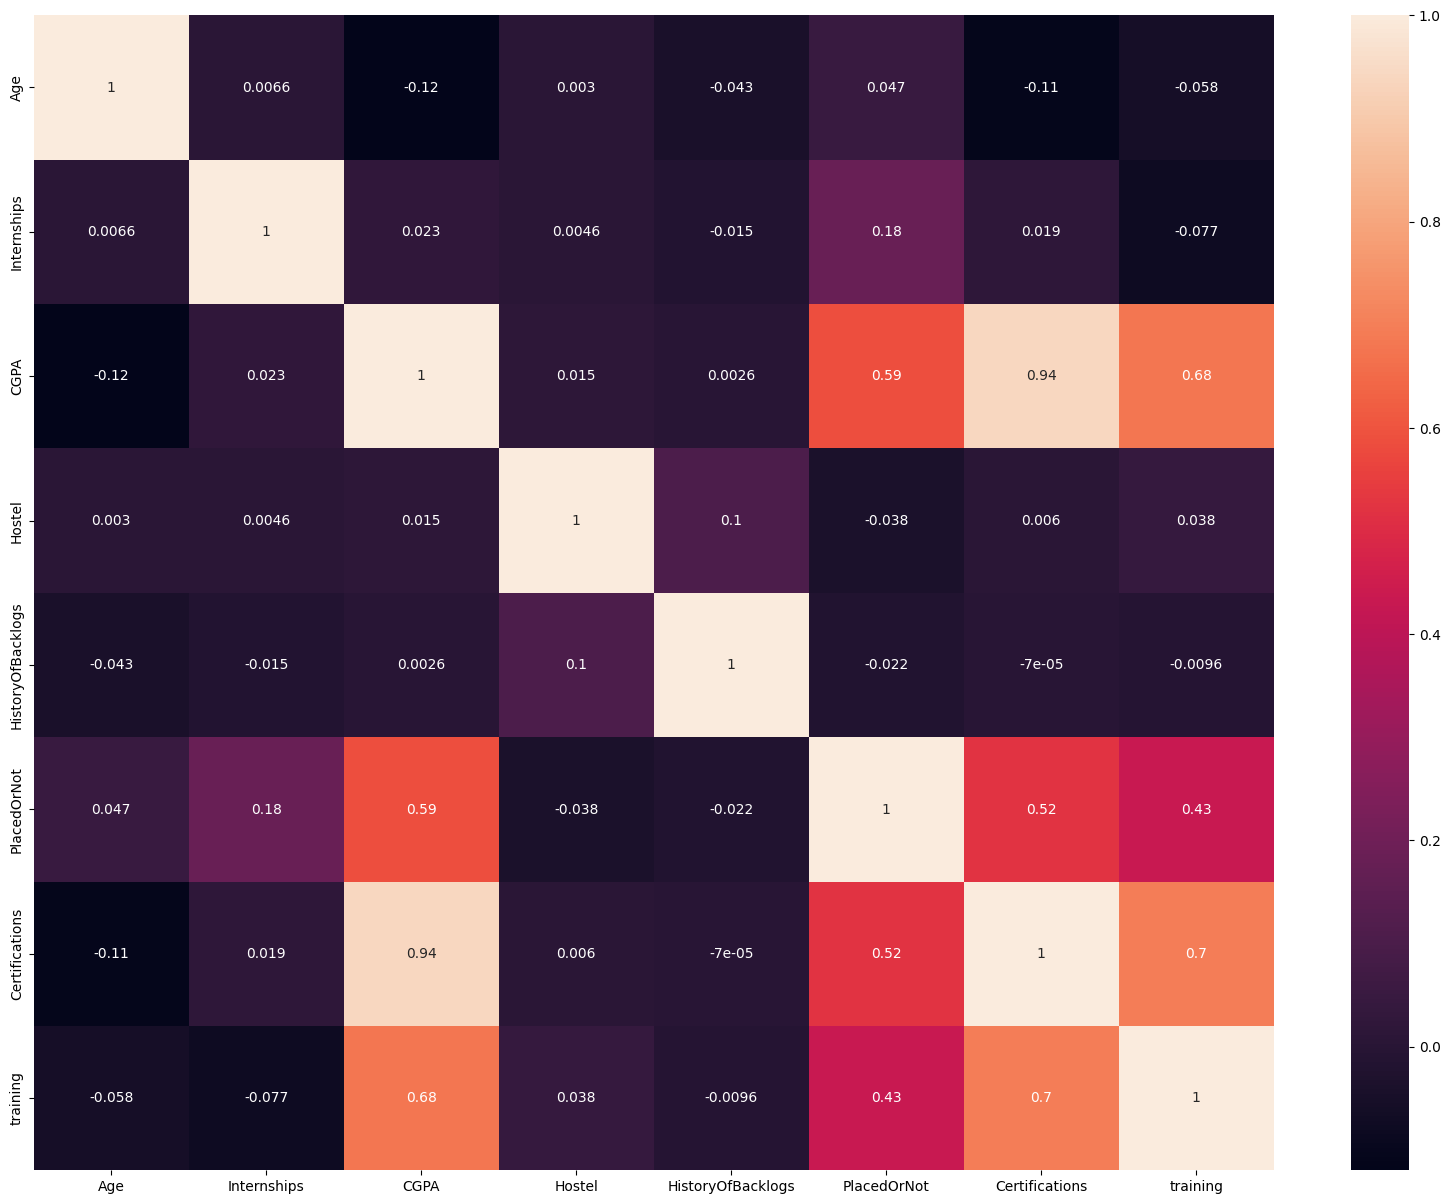

In [350]:
corrmat = data.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,15))

#plot heat map
g = sns.heatmap(data[top_corr_features].corr(),annot=True)

In [351]:
data=data.drop(['Hostel','Age','Stream','Gender'],axis=1)


In [352]:
data

,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot,Certifications,training
0,1,8,1,1,4,1
1,0,7,1,1,3,0
2,1,6,0,1,1,0
3,0,8,1,1,4,1
4,0,8,0,1,4,1
...,...,...,...,...,...,...
2961,0,7,0,0,3,0
2962,1,7,0,0,3,1
2963,1,7,0,0,3,1
2964,1,7,0,0,3,1


In [353]:
data.rename(columns={"CGPA": "cgpa"})

,Internships,cgpa,HistoryOfBacklogs,PlacedOrNot,Certifications,training
0,1,8,1,1,4,1
1,0,7,1,1,3,0
2,1,6,0,1,1,0
3,0,8,1,1,4,1
4,0,8,0,1,4,1
...,...,...,...,...,...,...
2961,0,7,0,0,3,0
2962,1,7,0,0,3,1
2963,1,7,0,0,3,1
2964,1,7,0,0,3,1


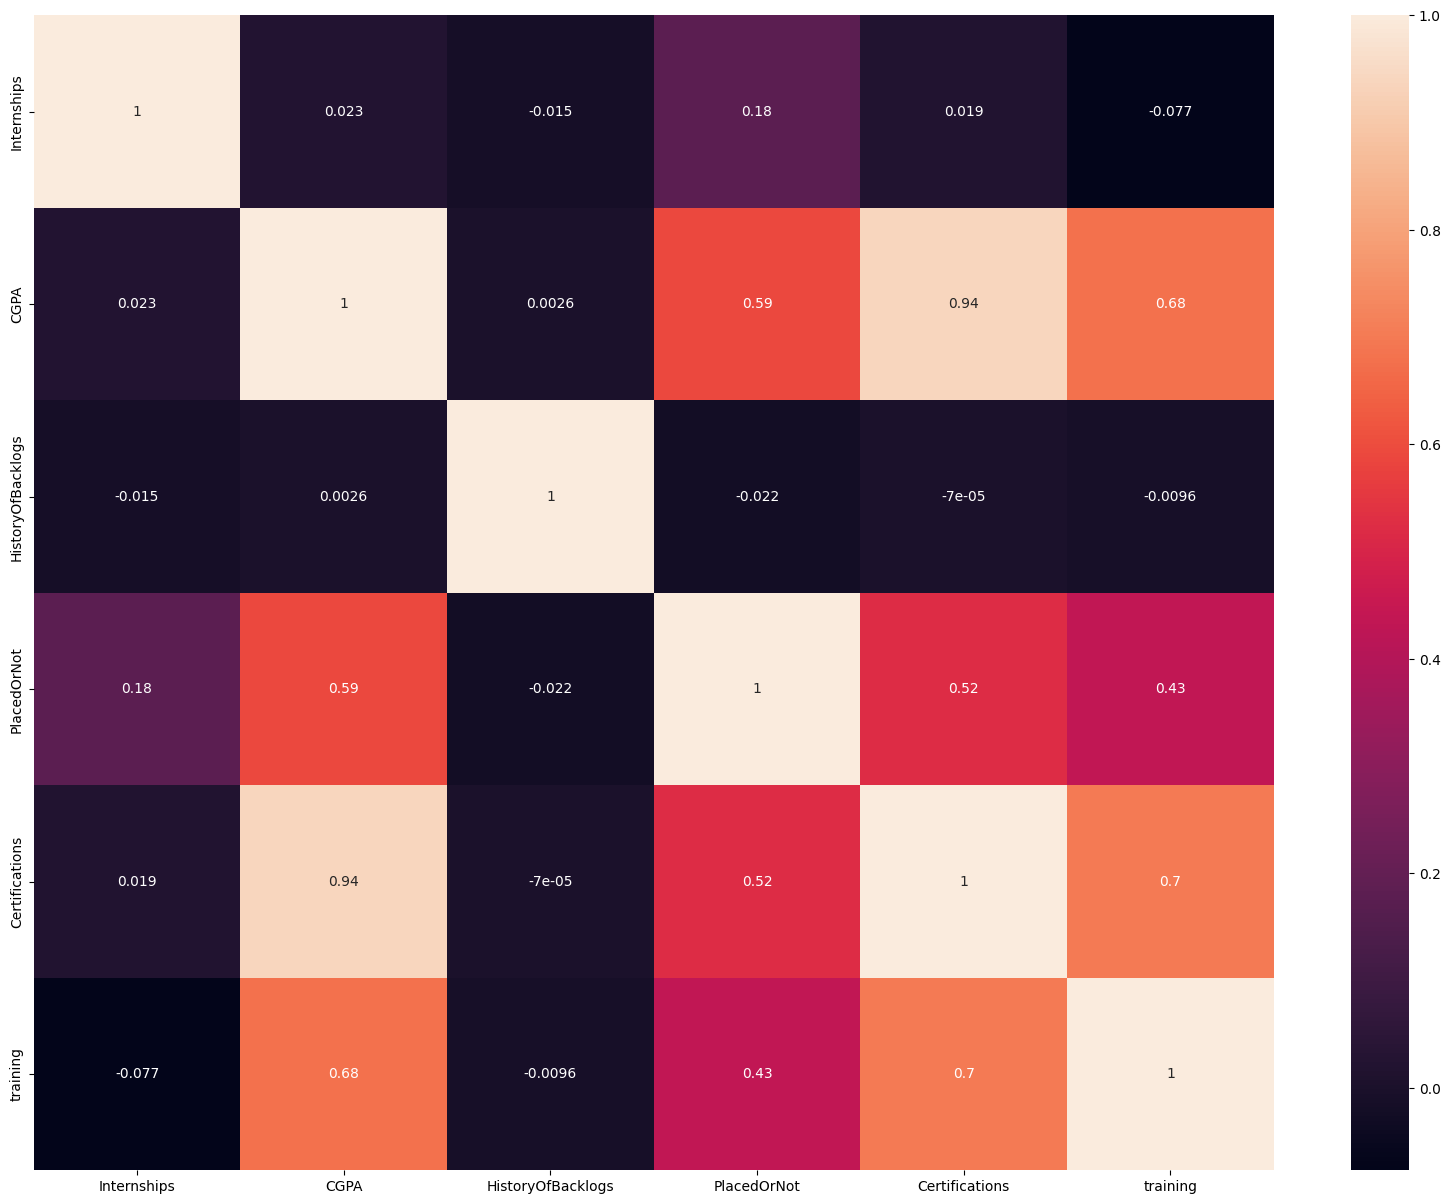

In [354]:
corrmat = data.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,15))

#plot heat map
g = sns.heatmap(data[top_corr_features].corr(),annot=True)

In [355]:
data.to_csv('updated_student_placement_data.csv', index=False)


In [356]:
X=data.drop(['PlacedOrNot'],axis=1)

In [357]:
y=data['PlacedOrNot']

In [358]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.33,
                                                    random_state = 0)


In [359]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of X_test is: {X_test.shape}\n")

print(f"Shape of y_train is: {y_train.shape}")
print(f"Shape of y_test is: {y_test.shape}")

Shape of X_train is: (1987, 5)
Shape of X_test is: (979, 5)

Shape of y_train is: (1987,)
Shape of y_test is: (979,)


In [360]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [361]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [362]:
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

    

Accuracy Score:  0.8590398365679265


In [363]:
import pickle 
pickle.dump(clf,open('model.pkl','wb'))